In [ ]:
# Loading the dataset
import pandas as pd

# Load the dataset
file_path = '/content/Titanic-Dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Data cleaning
# Check for missing values
missing_values = df.isnull().sum()

# Drop columns with a high percentage of missing values or irrelevant columns
df_cleaned = df.drop(columns=['Cabin', 'Ticket'])

# Fill missing values in 'Age' with the median age
df_cleaned['Age'].fillna(df_cleaned['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the most common port
df_cleaned['Embarked'].fillna(df_cleaned['Embarked'].mode()[0], inplace=True)

# Convert 'Sex' and 'Embarked' to categorical variables
df_cleaned['Sex'] = df_cleaned['Sex'].astype('category')
df_cleaned['Embarked'] = df_cleaned['Embarked'].astype('category')

# Check the cleaned data
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Fare         891 non-null    float64 
 9   Embarked     891 non-null    category
dtypes: category(2), float64(2), int64(5), object(1)
memory usage: 57.8+ KB


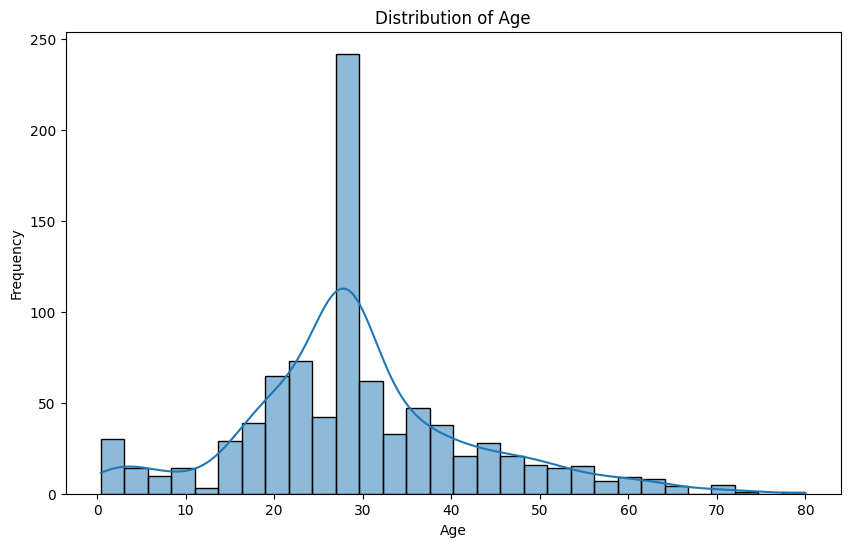

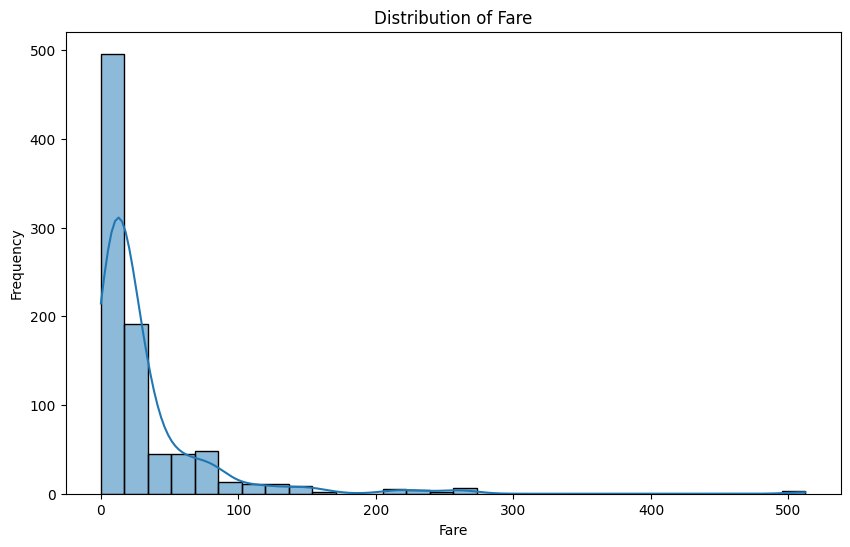

In [ ]:
#EDA
#Distribution of numeric variables
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Fare
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Fare'], kde=True, bins=30)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

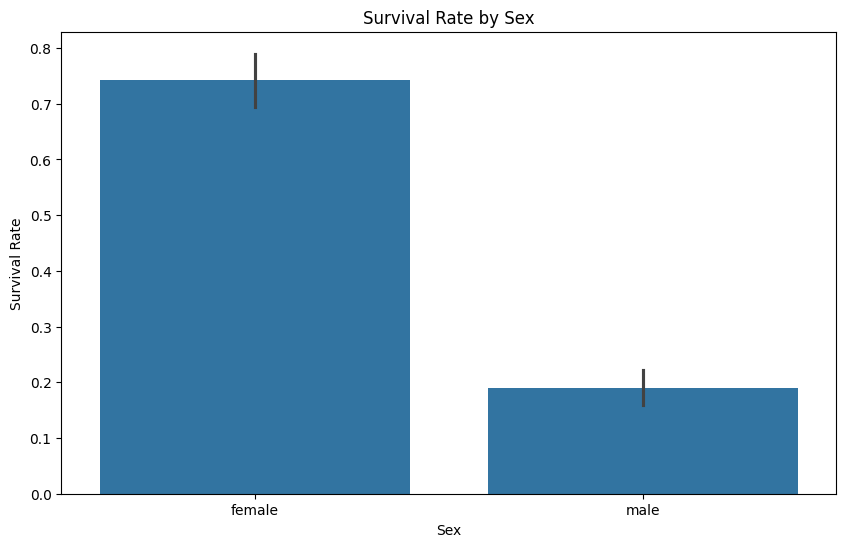

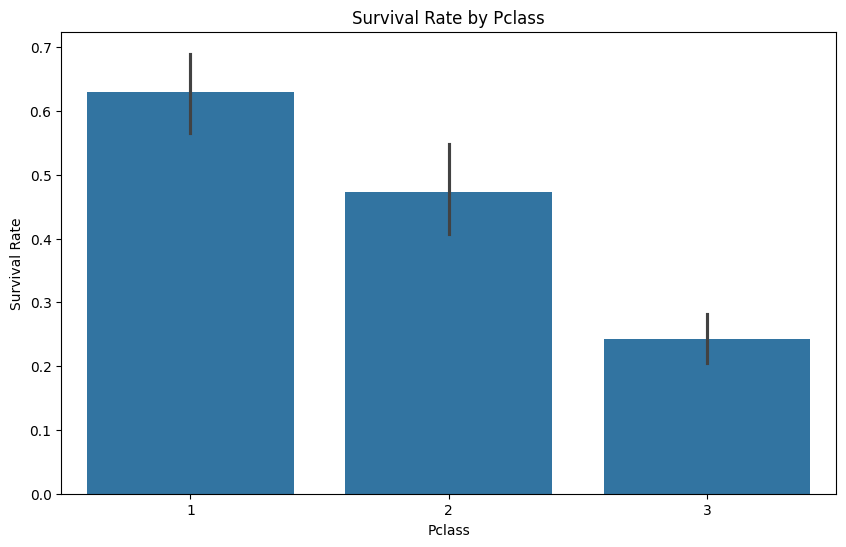

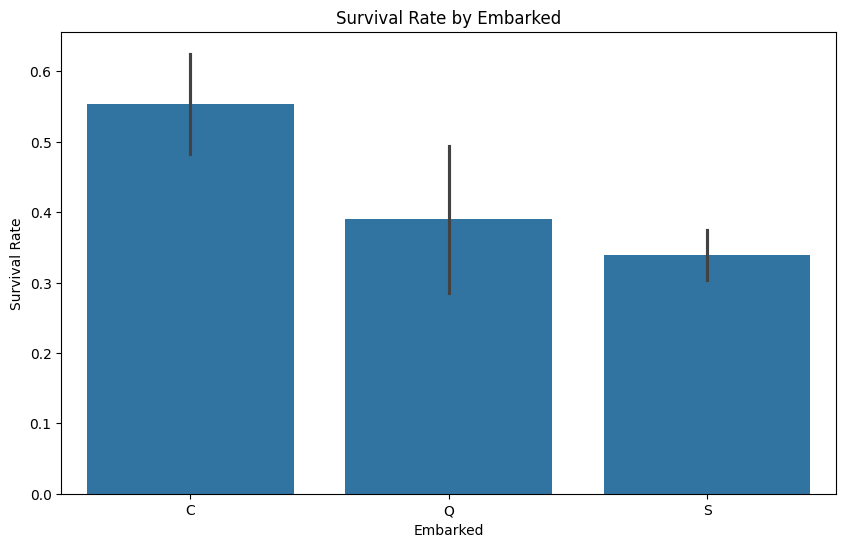

In [ ]:
#Survival rate by categorical var
# Survival rate by Sex
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=df_cleaned)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

# Survival rate by Pclass
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df_cleaned)
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

# Survival rate by Embarked
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked', y='Survived', data=df_cleaned)
plt.title('Survival Rate by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.show()

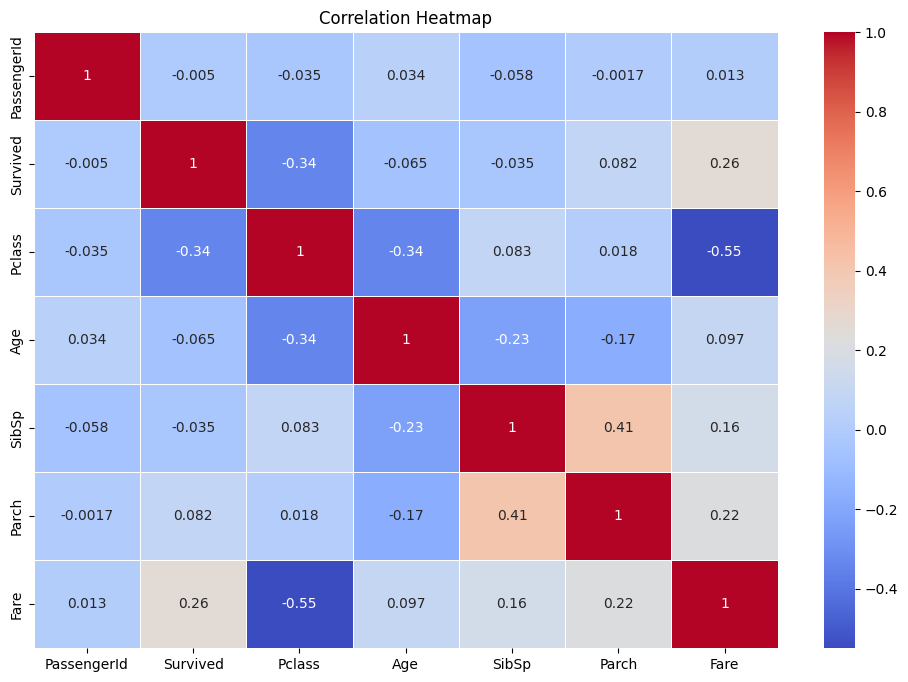

In [ ]:
# Correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude non-numeric columns
numeric_df = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()